# <font color=#00008B>1. Business Understanding & Problem Statement</font>

## <font color='blue'>1.1. Business Understanding</font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## <font color='blue'>1.2. Problem Statement</font>

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
There are quite a few goals for this case study:

- **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**
- **There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.**


# <font color=#00008B>2. Importing Packages</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# <font color=#00008B>3. Load Application Data</font>

In [3]:
#importing csv file 

leads_df=pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## <font color='blue'>3.1. Review the data</font>

In [4]:
#checking Thew data
leads_df.shape

(9240, 37)

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## <font color='blue'>3.2. Review data Summary</font>

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>There are a total of **9240 (rows)** and **37 columns** in the dataframe.</font>
  
  - <font color='#800000'>There are **7 columns** with a **numeric** datatype and **30 columns** with an **object** datatype.</font>
  
  - <font color='#800000'>There are **17 columns have missing values**  in the data.</font>

# <font color=#00008B>4. Data Cleaning & Data Analysis</font>

## <font color='blue'>4.1. Unique Values</font>

In [7]:
# The columns Prospect ID, and Lead Number look like unique values let's check if we have duplicates

In [8]:
sum(leads_df.duplicated(subset = 'Prospect ID'))

0

In [9]:
sum(leads_df.duplicated(subset = 'Lead Number'))

0

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Prospect ID & Lead Number both of them look like a record identifier (PK) so no need for them in the model and we will drop them.</font>

In [10]:
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [11]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

## <font color='blue'>4.2. Select Values in the Categural Variables </font>

we have the value Select in more than one column let's check  

In [12]:
#we have the value Select in more than one column let's check

for col in leads_df.columns:
    if (len(leads_df[leads_df[col]=='Select'])>0):
        print(col , len(leads_df[leads_df[col]=='Select']))

Specialization 1942
How did you hear about X Education 5043
Lead Profile 4146
City 2249


In [13]:
#Replace 'Select' values with NaN.
leads_df = leads_df.replace('Select', np.nan)

In [14]:
#check of we still have any Select vlue

for col in leads_df.columns:
    if (len(leads_df[leads_df[col]=='Select'])>0):
        print(col , len(leads_df[leads_df[col]=='Select']))

## <font color='blue'>4.3. Null Values</font>

In [15]:
#check null values

leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [16]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df)), 1)

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [17]:
# Drop all the variables have more than 40% null values
for col in leads_df.columns:
    if((100*(leads_df[col].isnull().sum()/len(leads_df))) >= 40):
        leads_df.drop(col, 1, inplace = True)

In [18]:
#checking percentage of null values in each column
round(100*(leads_df.isnull().sum()/len(leads_df)), 1)

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

## <font color='blue'>4.4. Categorical Attributes Analysis (Null Values and duplication)</font>

### <font color='darkgreen'>4.4.1 Country</font>

In [19]:
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [20]:
# most of the records have the value India so we can replace the NaN with this value
leads_df['Country'] = leads_df['Country'].replace(np.nan,'India')

In [21]:
round(leads_df['Country'].value_counts(dropna=False)/len(leads_df)*100,2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>more than 96% from the records have the value 'India'. so we will drop Country column.</font>

In [22]:
# more than 96% from the records have the value 'India'. so we will drop this column
leads_df.drop('Country', 1, inplace = True)

### <font color='darkgreen'>4.4.2 Specialization</font>

In [23]:
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [24]:
# Since there is no most value we will create a new Specialization called Unspecified and replace the NaN with it
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Unspecified')

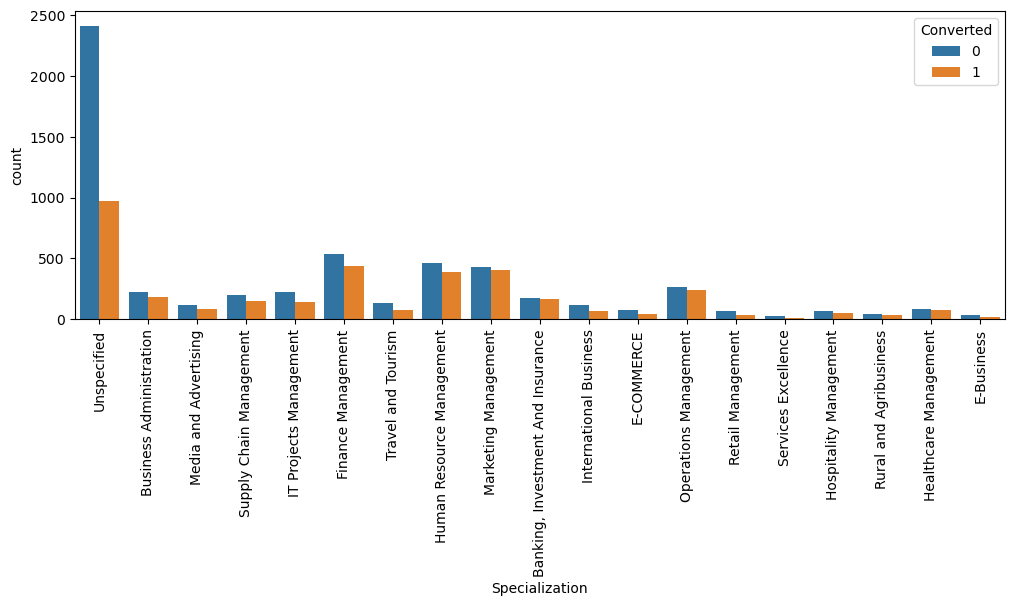

In [25]:
# the targeted variable is Converted let's have a chart for City and  Converted
plt.figure(figsize=(12,4))

fig1=sns.countplot(leads_df['Specialization'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>it's clear that  Management specializations leads. So this is definitely a significant variable and should not be dropped.</font>
  - <font color='#800000'>since we have more than one management specialization and all of them are managment so we will marge them in to 'Management_Specializations'.</font>  

In [26]:
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

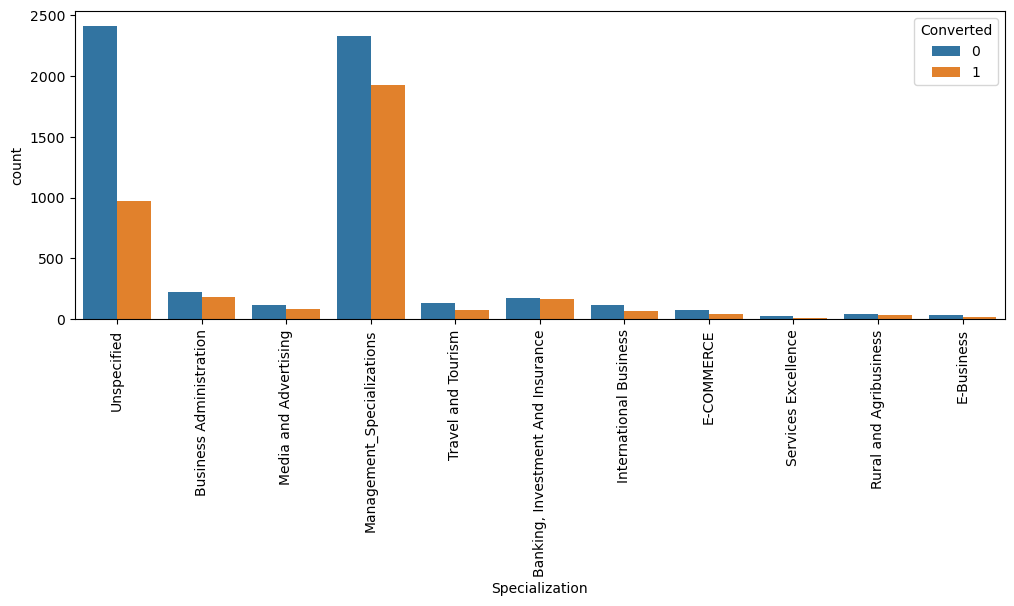

In [27]:
# the targeted variable is Converted let's have a chart for City and  Converted
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['Specialization'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

### <font color='darkgreen'>4.4.3 What is your current occupation</font> 

In [28]:
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#Replace NaN values with mode comman value "Unemployed"

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

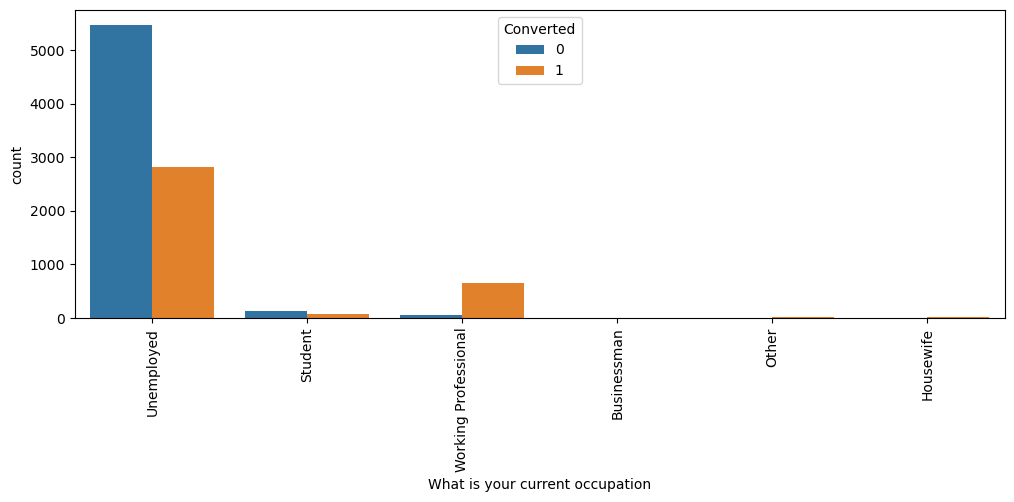

In [30]:
# the targeted variable is Converted let's have a chart for City and  Converted
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['What is your current occupation'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Working Professionals going for the course have high chances of joining it.</font>
  - <font color='#800000'>Unemployed leads are the most in terms of Absolute numbers.</font>  

### <font color='darkgreen'>4.4.4 What matters most to you in choosing a course</font> 

In [31]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
#replacing Nan values with Mode "Better Career Prospects"

leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [33]:
round(leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)/len(leads_df)*100,2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>more than 99% from the records have the value 'Better Career Prospects'. so we will drop this column.</font> 

In [34]:
leads_df.drop('What matters most to you in choosing a course', 1, inplace = True)

### <font color='darkgreen'>4.4.5 Tags</font>  

In [35]:
#check value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [36]:
# Since there is no most value we will create a new Tag called Unspecified and replace the NaN with it
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Unspecified')

In [37]:
#check value counts of Tag variable
leads_df['Tags'].value_counts(dropna=False)<100

Unspecified                                          False
Will revert after reading the email                  False
Ringing                                              False
Interested in other courses                          False
Already a student                                    False
Closed by Horizzon                                   False
switched off                                         False
Busy                                                 False
Lost to EINS                                         False
Not doing further education                          False
Interested  in full time MBA                         False
Graduation in progress                               False
invalid number                                        True
Diploma holder (Not Eligible)                         True
wrong number given                                    True
opp hangup                                            True
number not provided                                   Tr

In [38]:
#replacing tags with low frequency with "Other Tags"
leads_df['Tags'] = leads_df['Tags'].replace(['invalid number'  ,'Diploma holder (Not Eligible)'  ,'wrong number given',
                                             'opp hangup','number not provided','in touch with EINS','Lost to Others',
                                             'Still Thinking','Want to take admission but has financial problems',
                                             'In confusion whether part time or DLP','Interested in Next batch',
                                             'Lateral student','Shall take in the next coming month',
                                             'University not recognized' ,'Recognition issue (DEC approval)'], 'Others')

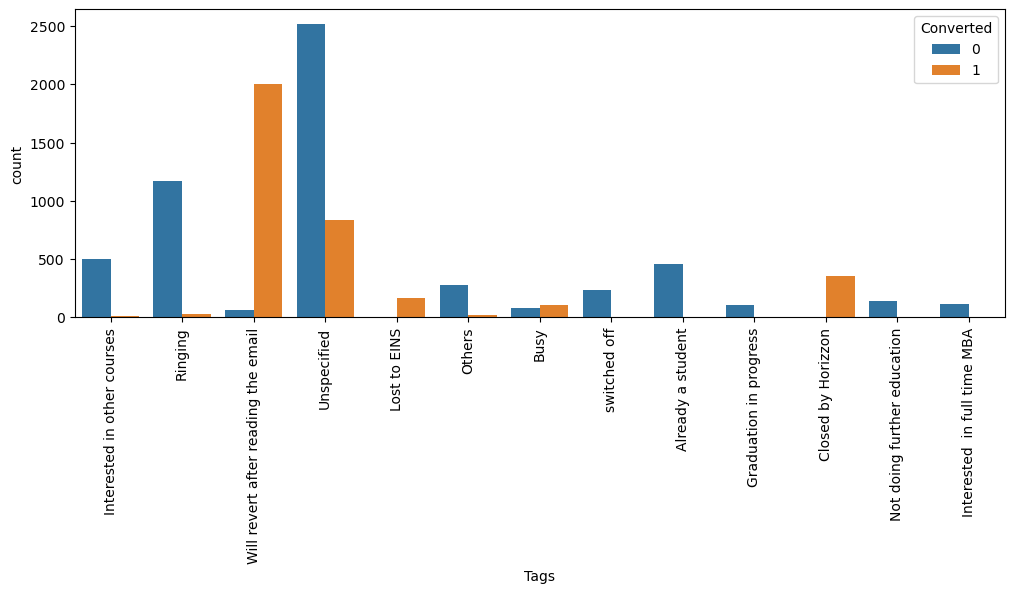

In [39]:
# the targeted variable is Converted let's have a chart for Tag and  Converted
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['Tags'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>ince there is no most value we create a new Tag called Unspecified and replace the NaN with it.</font>
  - <font color='#800000'>We Replace tags with low frequency with "Other Tags".</font>
  - <font color='#800000'>"Will revert after reading the email" and "Closed by Horizzon" have high chances of joining it.</font> 
  - <font color='#800000'>Unemployed leads are the most in terms of Absolute numbers.</font>
  

### <font color='darkgreen'>4.4.6 City</font>   

In [40]:
#check value counts of "City" column

leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [41]:
# replace NaN with the most used value 'Mumbai'
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

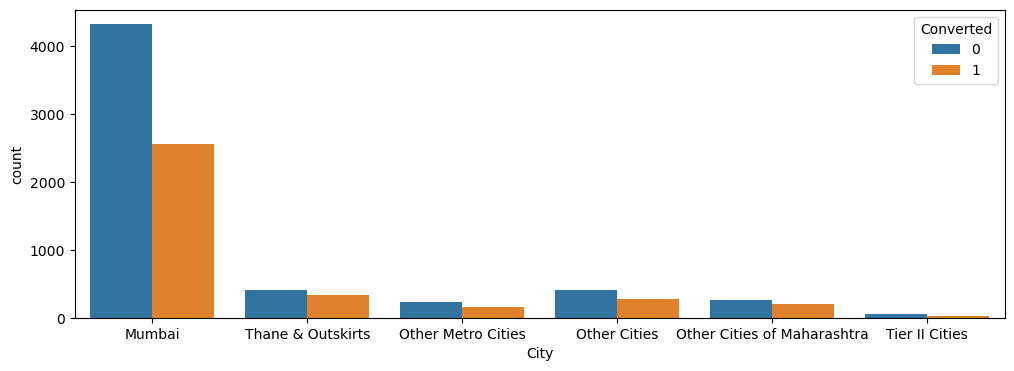

In [42]:
# the targeted variable is Converted let's have a chart for City and  Converted
plt.figure(figsize=(12,4))
sns.countplot(leads_df['City'], hue=leads_df['Converted'])
plt.show()

In [43]:
#Check the Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Since the number of rows have null values is less than 2%, Drop all rows which have NaN Values. and it will not affect the model.</font>
  

In [44]:
leads_df = leads_df.dropna()

### <font color='darkgreen'>4.4.7 Lead Source</font>    

In [45]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [46]:
# we will marge Facebook with Social Media 
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
# we will replace google with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
# marge all the categories less than 10 in others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

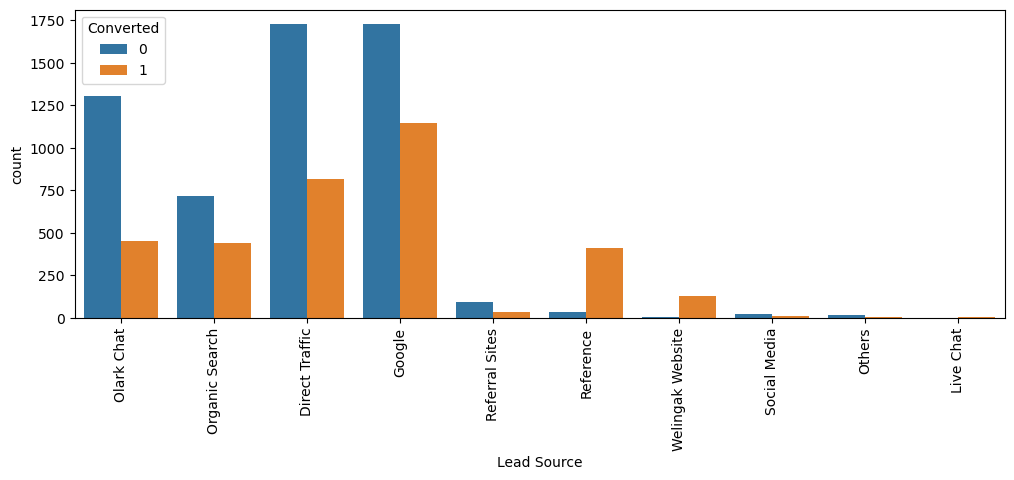

In [47]:
# the targeted variable is Converted let's have a chart for City and  Converted
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['Lead Source'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Maximum number of leads are generated by Google, Direct traffic, Olark Chat, and Organic Search.</font>
  - <font color='#800000'>Conversion Rate of reference and welingak website leeds is high.</font>
  - <font color='#800000'>To improve overall lead conversion rate, focus should be on improving lead converion of Google, Direct traffic, Olark Chat, and Organic Search leads and generate more leads from reference and welingak website.</font>

  

### <font color='darkgreen'>4.4.8 Last Activity</font>     

In [48]:
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [49]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                                         'View in browser link Clicked','Approached upfront','Email Received',
                                                         'Email Marked Spam','Visited Booth in Tradeshow',
                                                         'Resubscribed to emails'],'Others')

In [50]:
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Others                        191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

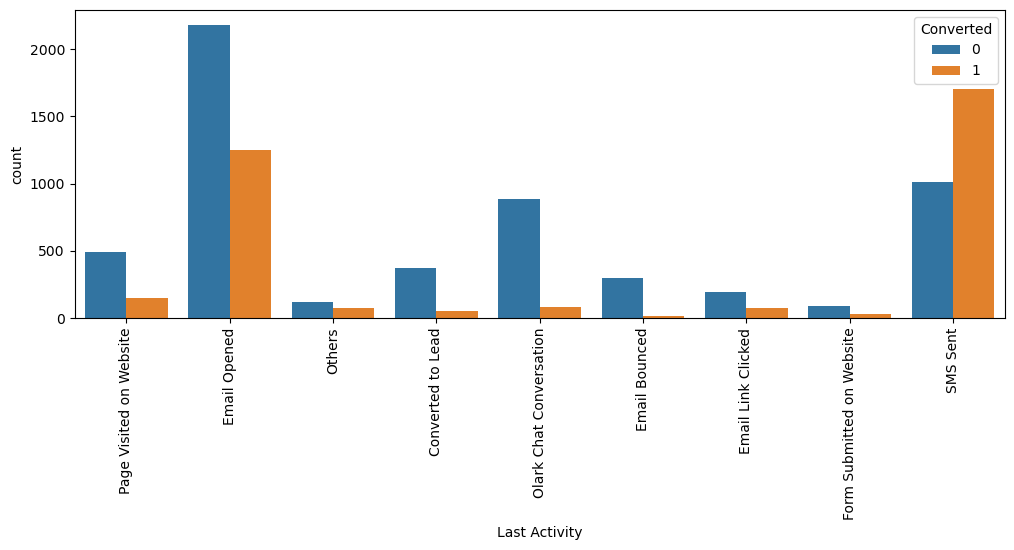

In [51]:
# the targeted variable is Converted let's have a chart for City and  Converted
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['Last Activity'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Maximum number of leads are for Email Opened and SMS Sent.</font>
  - <font color='#800000'>Conversion Rate of SMS Sent leeds is high.</font>
  

### <font color='darkgreen'>4.4.9 Lead Origin</font>

In [52]:
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

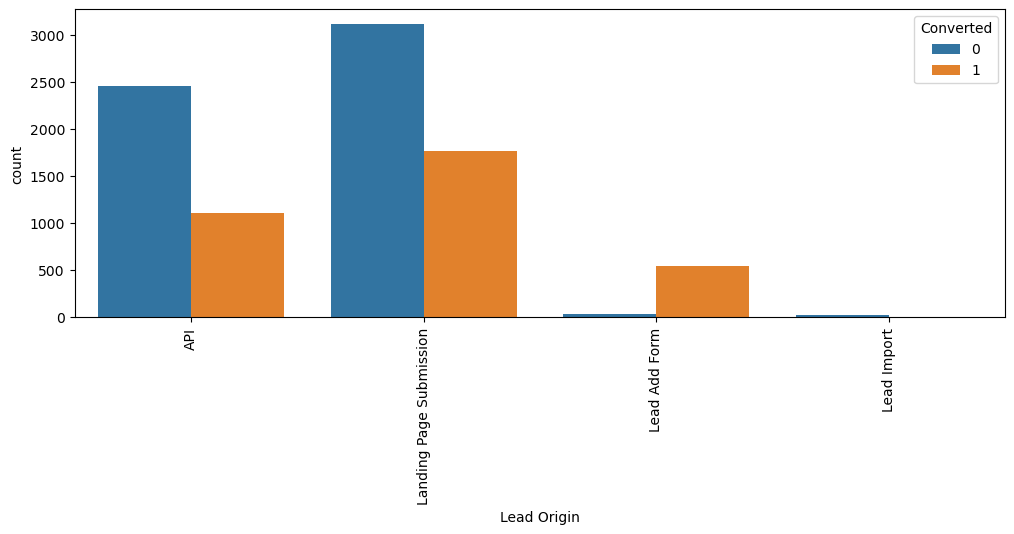

In [53]:
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['Lead Origin'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>API and Landing Page Submission bring higher number of leads as well as conversion.</font>
  - <font color='#800000'>Lead Add Form has a very high conversion rate but count of leads are not very high.</font>
  - <font color='#800000'>In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.</font>


### <font color='darkgreen'>4.4.10 Do Not Email</font>

In [54]:
leads_df['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

### <font color='darkgreen'>4.4.11 Do Not Call</font>

In [55]:
leads_df['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>most of the records have the value 'No'. so we will drop 'Do Not Call' column.</font>


In [56]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('Do Not Call', 1, inplace = True)

In [57]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### <font color='darkgreen'>4.4.12 Search</font>

In [58]:
leads_df['Search'].value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>most of the records have the value 'No'. so we will drop 'Search' column.</font>


In [59]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('Search', 1, inplace = True)

### <font color='darkgreen'>4.4.13 Magazine</font>

In [60]:
leads_df['Magazine'].value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>All of the records have the value 'No'. so we will drop 'Magazine' column.</font>


In [61]:
# all the records have the value 'No'. so we will drop this column
leads_df.drop('Magazine', 1, inplace = True)

### <font color='darkgreen'>4.4.14 Newspaper Article</font> 

In [62]:
leads_df['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Most of the records have the value 'No'. so we will drop 'Newspaper Article' column.</font>


In [63]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('Newspaper Article', 1, inplace = True)

### <font color='darkgreen'>4.4.15 X Education Forums</font> 

In [64]:
leads_df['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Most of the records have the value 'No'. so we will drop 'X Education Forums' column.</font>


In [65]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('X Education Forums', 1, inplace = True)

### <font color='darkgreen'>4.4.16 Digital Advertisement</font>  

In [66]:
leads_df['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Most of the records have the value 'No'. so we will drop 'Digital Advertisement' column.</font>


In [67]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('Digital Advertisement', 1, inplace = True)

### <font color='darkgreen'>4.4.17 Newspaper</font>  

In [68]:
leads_df['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Most of the records have the value 'No'. so we will drop 'Newspaper' column.</font>


In [69]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('Newspaper', 1, inplace = True)

### <font color='darkgreen'>4.4.18 Through Recommendations</font>  

In [70]:
leads_df['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Most of the records have the value 'No'. so we will drop 'Through Recommendations' column.</font>


In [71]:
# most of the records have the value 'No'. so we will drop this column
leads_df.drop('Through Recommendations', 1, inplace = True)

### <font color='darkgreen'>4.4.19 Receive More Updates About Our Courses</font>  

In [72]:
leads_df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>All of the records have the value 'No'. so we will drop 'Receive More Updates About Our Courses' column.</font>


In [73]:
# all of the records have the value 'No'. so we will drop this column
leads_df.drop('Receive More Updates About Our Courses', 1, inplace = True)

### <font color='darkgreen'>4.4.20 Update me on Supply Chain Content</font>  

In [74]:
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>All of the records have the value 'No'. so we will drop 'Update me on Supply Chain Content' column.</font>


In [75]:
# all of the records have the value 'No'. so we will drop this column
leads_df.drop('Update me on Supply Chain Content', 1, inplace = True)

### <font color='darkgreen'>4.4.21 Get updates on DM Content</font>  

In [76]:
leads_df['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>All of the records have the value 'No'. so we will drop 'Get updates on DM Content' column.</font>


In [77]:
# all of the records have the value 'No'. so we will drop this column
leads_df.drop('Get updates on DM Content', 1, inplace = True)

### <font color='darkgreen'>4.4.22 I agree to pay the amount through cheque</font> 

In [78]:
leads_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>All of the records have the value 'No'. so we will drop 'I agree to pay the amount through cheque' column.</font>


In [79]:
# all of the records have the value 'No'. so we will drop this column
leads_df.drop('I agree to pay the amount through cheque', 1, inplace = True)

### <font color='darkgreen'>4.4.23 A free copy of Mastering The Interview</font>  

In [80]:
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### <font color='darkgreen'>4.4.24 Last Notable Activity</font>  

In [81]:
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [82]:
# replace low numbers with Others
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                         'Had a Phone Conversation','Email Marked Spam',
                                                                         'Approached upfront','Resubscribed to emails',
                                                                         'View in browser link Clicked',
                                                                         'Form Submitted on Website',
                                                                         'Email Received'],'Others')

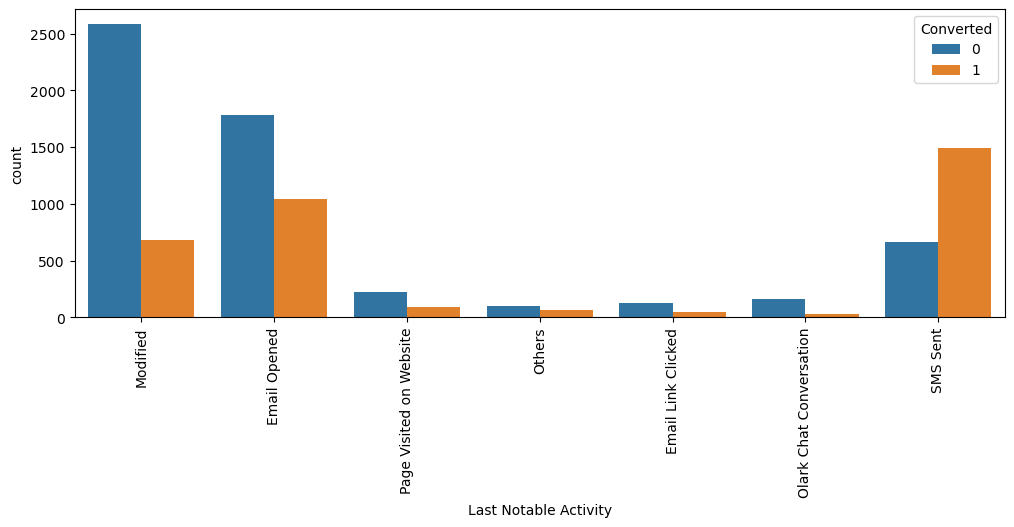

In [83]:
plt.figure(figsize=(12,4))
fig1=sns.countplot(leads_df['Last Notable Activity'], hue=leads_df['Converted'])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=90)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Modified, Email Opened, and SMS Sent bring higher number of leads as well as conversion.</font>
  - <font color='#800000'>SMS Sent has a very high conversion rate.</font>
  - <font color='#800000'>In order to improve overall lead conversion rate, we have to improve lead converion ofModified, Email Opened, and SMS Sent.</font>


In [84]:
# check leads_df
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

## <font color='blue'>4.5. Numerical Attributes Analysis</font> 

### <font color='darkgreen'>4.5.1 Numeric Variables Correlation </font>  

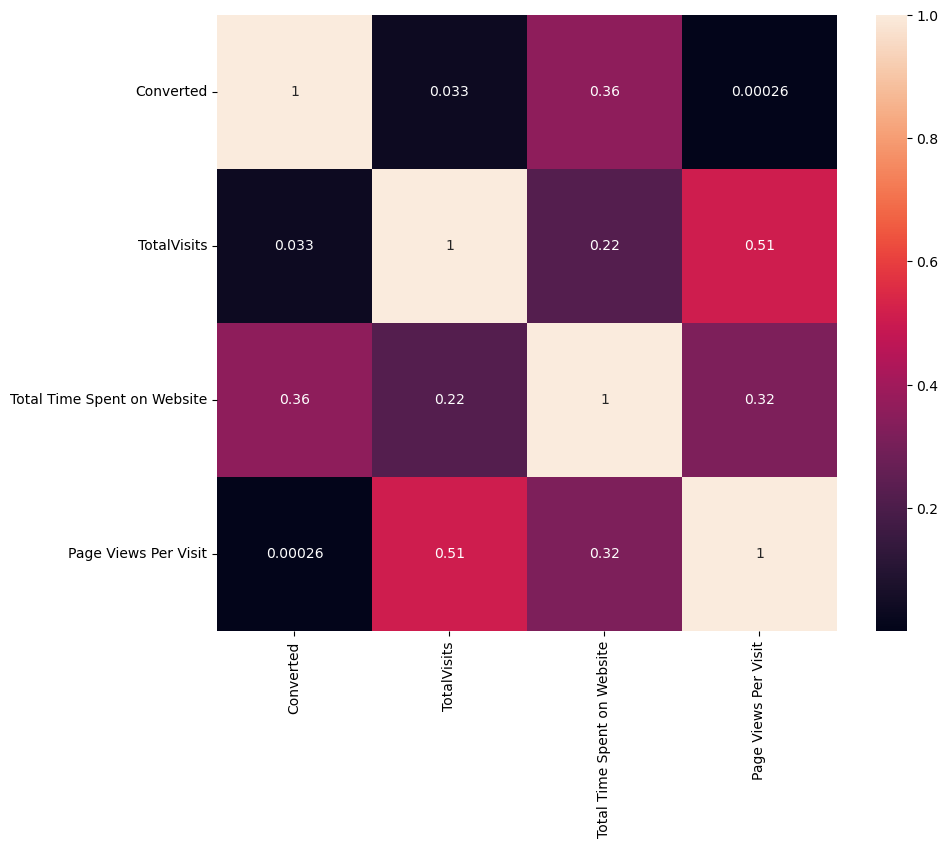

In [85]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))
sns.heatmap(leads_df.corr(), annot=True)
plt.show()

### <font color='darkgreen'>4.5.2 TotalVisits </font>  

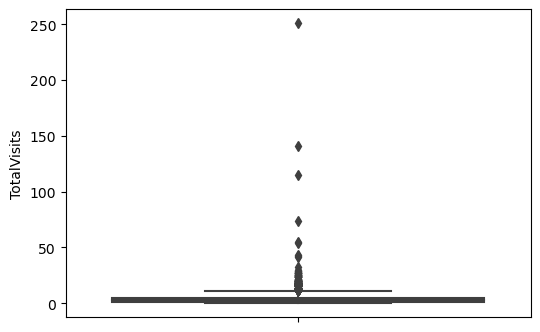

In [86]:
# check the outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [87]:
#checking percentile values for "Total Visits"
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [88]:
#Outlier Treatment: Remove top 1% of the Column Outlier values (All the outliers in the top)
top_value = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df['TotalVisits'] <= top_value)]

In [89]:
leads_df.shape

(8991, 14)

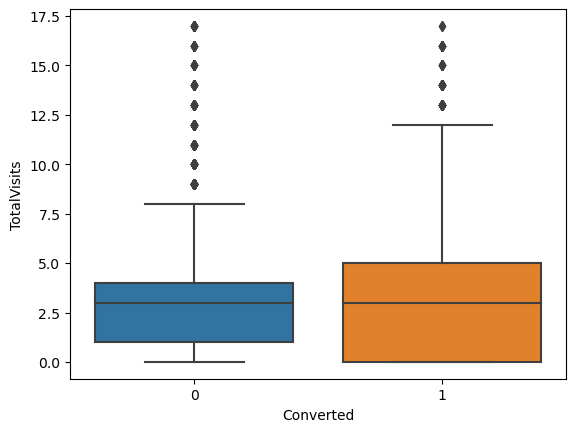

In [90]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Median for converted and not converted leads are the close.</font>


### <font color='darkgreen'>4.5.3 Total Time Spent on Website </font>  

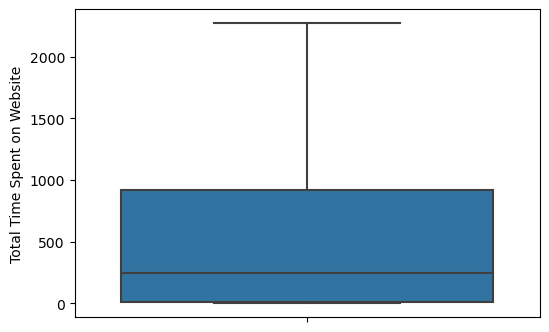

In [91]:
# check the outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

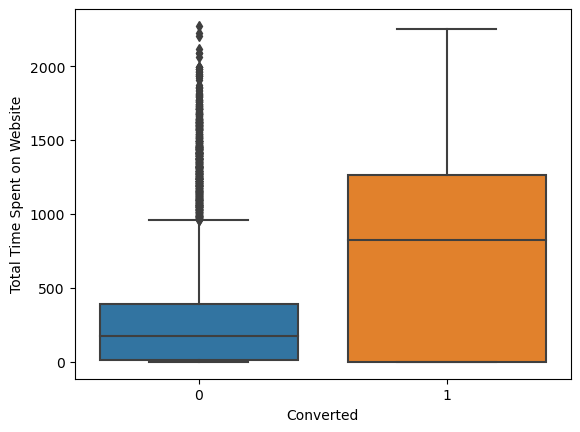

In [92]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>No major Outliers for the above variable.</font>
  - <font color='#800000'>Leads spending more time on the website are more likely to be converted.</font>
  - <font color='#800000'>Website should be interested to make leads spend more time.</font>


### <font color='darkgreen'>4.5.4 Page Views Per Visit </font>  

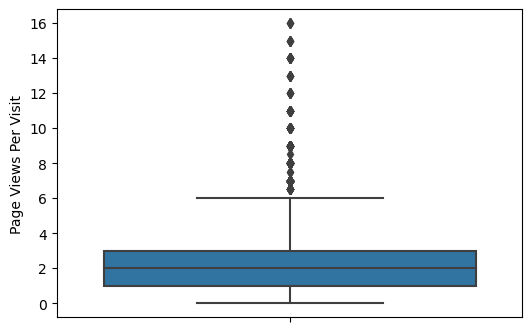

In [93]:
# check the outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

In [94]:
#Outlier Treatment: Remove top  1% 

top_value = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df = leads_df[(leads_df['Page Views Per Visit'] <= top_value)]

In [95]:
leads_df.shape

(8924, 14)

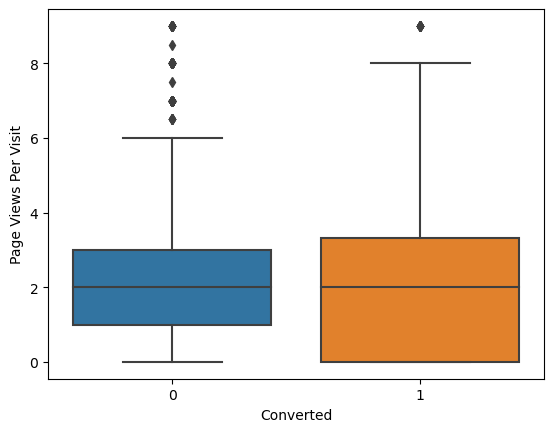

In [96]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>Median for converted and unconverted leads is the same.</font>


# <font color=#00008B>5. Dummy Variable</font>

In [97]:
# Print the categorical columns in the data Frame
print(leads_df.select_dtypes(include=['object']).columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [98]:
# Check the values in each categorical variable
for col in leads_df.select_dtypes(include=['object']).columns:
    print('----'+col+'-----')
    print(leads_df[col].value_counts())

----Lead Origin-----
Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64
----Lead Source-----
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Social Media          33
Others                18
Live Chat              2
Name: Lead Source, dtype: int64
----Do Not Email-----
No     8235
Yes     689
Name: Do Not Email, dtype: int64
----Last Activity-----
Email Opened                 3385
SMS Sent                     2678
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        185
Form Submitted on Website     114
Name: Last Activity, dtype: int64
----Specialization-----
Management_Specializations           4119
Unspecif

In [99]:
# 'Do Not Email'  & 'A free copy of Mastering The Interview' has Yes/No values 
binary_list=['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads_df[binary_list] = leads_df[binary_list].apply(binary_map)

In [100]:
# Create a dummy variables for Lead Origin and drop the first one
Lead_origin_dummy = pd.get_dummies(leads_df['Lead Origin'], prefix = 'Lead Origin',drop_first=True)
leads_df = pd.concat([leads_df,Lead_origin_dummy],1)

In [101]:
# Create a dummy variables for Lead Source and drop the Others variable 
Lead_source_dummy = pd.get_dummies(leads_df['Lead Source'],prefix  = 'Lead Source')
Lead_source_dummy = Lead_source_dummy.drop(['Lead Source_Others'], 1)
leads_df = pd.concat([leads_df,Lead_source_dummy],1)

In [102]:
# Create a dummy variables for Last Activity and drop the Others variable 
last_activity_dummy = pd.get_dummies(leads_df['Last Activity'], prefix  = 'Last Activity')
last_activity_dummy = last_activity_dummy.drop(['Last Activity_Others'], 1)
leads_df = pd.concat([leads_df, last_activity_dummy], axis = 1)

In [103]:
# Create a dummy variables for Specialization and drop the Unspecified variable 
specialization_dummy = pd.get_dummies(leads_df['Specialization'], prefix  = 'Specialization')
specialization_dummy = specialization_dummy.drop(['Specialization_Unspecified'], 1)
leads_df = pd.concat([leads_df, specialization_dummy], axis = 1)

In [104]:
# Create a dummy variables for What is your current occupation and drop the first one
your_current_occupation_dummy = pd.get_dummies(leads_df['What is your current occupation'], prefix  = 'What is your current occupation' ,drop_first=True)
leads_df = pd.concat([leads_df,your_current_occupation_dummy],1)

In [105]:
# Create a dummy variables for Tags and drop the Unspecified variable 
tags_dummy = pd.get_dummies(leads_df['Tags'], prefix  = 'Tags')
tags_dummy = tags_dummy.drop(['Tags_Unspecified'], 1)
leads_df = pd.concat([leads_df, tags_dummy], axis = 1)

In [106]:
# Create a dummy variables for City and drop the first one
city_dummy = pd.get_dummies(leads_df['City'], prefix  = 'City', drop_first=True)
leads_df = pd.concat([leads_df,city_dummy],1)

In [107]:
# Create a dummy variables for Last Notable Activity and drop the Others variable 
last_notable_activity_dummy = pd.get_dummies(leads_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
last_notable_activity_dummy = last_notable_activity_dummy.drop(['Last Notable Activity_Others'], 1)
leads_df = pd.concat([leads_df, last_notable_activity_dummy], axis = 1)

In [108]:
# Drop all the Object type columns from the dataframe
cat_col=leads_df.select_dtypes(include=['object']).columns
leads_df.drop(cat_col,1,inplace = True)

In [109]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8924 non-null   int64  
 1   Converted                                             8924 non-null   int64  
 2   TotalVisits                                           8924 non-null   float64
 3   Total Time Spent on Website                           8924 non-null   int64  
 4   Page Views Per Visit                                  8924 non-null   float64
 5   A free copy of Mastering The Interview                8924 non-null   int64  
 6   Lead Origin_Landing Page Submission                   8924 non-null   uint8  
 7   Lead Origin_Lead Add Form                             8924 non-null   uint8  
 8   Lead Origin_Lead Import                               8924

In [110]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Actions</div>__

  - <font color='#800000'>'Do Not Email'  & 'A free copy of Mastering The Interview' has Yes/No values </font>
  - <font color='#800000'>Create a dummy variables for Lead Origin and drop the first one</font>
  - <font color='#800000'>reate a dummy variables for Lead Source and drop the Others variable </font>
  - <font color='#800000'>Create a dummy variables for Last Activity and drop the Others variable </font>
  - <font color='#800000'>Create a dummy variables for Specialization and drop the Unspecified variable </font>
  - <font color='#800000'>Create a dummy variables for What is your current occupation and drop the first one</font>
  - <font color='#800000'>Create a dummy variables for Tags and drop the Unspecified variable </font>
  - <font color='#800000'>Create a dummy variables for City and drop the first one</font>
  - <font color='#800000'>Create a dummy variables for Last Notable Activity and drop the Others variable </font>
  - <font color='#800000'>Drop all the Object type columns from the dataframe</font>


# <font color=#00008B>6. Logistic Regression Model Building</font>

## <font color='blue'>6.1. Train-Test Split</font> 

In [111]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads_df['Converted']
y.head()
X=leads_df.drop('Converted', axis=1)

In [112]:
# Splitting the data into train (70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [113]:
print(X_train.shape,X_test.shape)

(6246, 63) (2678, 63)


## <font color='blue'>6.2. Data Scaling</font> 

In [114]:
# scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6676,-0.285584,-0.049636,1.395668,0.395289,-0.669212,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6138,-0.285584,0.297929,0.609686,0.926758,-0.669212,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8650,-0.285584,-0.049636,1.178657,0.395289,1.494296,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3423,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6552,-0.285584,-1.092332,-0.878390,-1.199117,-0.669212,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## <font color='blue'>6.3. Model Building using Stats Model & RFE</font> 

In [115]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logistic_reg = LogisticRegression()
# running RFE with 15 variables as output
rfe = RFE(logistic_reg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [116]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False, False])

In [117]:
# use the columns select by RFE in the module
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### <font color='darkgreen'>6.3.1 Model 1 </font>  

In [118]:
# Building the Model #1

X_train_sm = sm.add_constant(X_train[col])
logRegm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logRegm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.2
Date:                Mon, 14 Aug 2023   Deviance:                       2830.5
Time:                        12:40:52   Pearson chi2:                 1.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5832
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1896      0.073    -16.390      0.000      -1.332      -1.047
Lead Source_Welingak Website                      4.0442      0.748      5.408      0.000       2.578       5.510
Last Activity_Email Bounced                      -1.2689      0.528     -2.402      0.016      -2.304      -0.233
Last Activity_SMS Sent                            2.0815      0.108     19.266      0.000       1.870       2.293
Tags_Already a student                           -2.8884      0.585     -4.935      0.000      -4.036      -1.741
Tags_Closed by Horizzon                           6.9793      0.721      9.680      0.000       5.566       8.392
Tags_Interested  in full time MBA                -1.5293      0.598     -2.559      0.010      -2.701      -0.358
Tags_Interested in other courses                 -1.8636      0.376     -4.961      0.000      -2.600      -1.127
Tags_Lost to EINS                                 5.8212      0.526     11.076      0.000       4.791       6.851
Tags_Not doing further education                 -2.7433      1.027     -2.671      0.008      -4.757      -0.730
Tags_Others                                      -2.2543      0.312     -7.224      0.000      -2.866      -1.643
Tags_Ringing                                     -3.5160      0.238    -14.787      0.000      -3.982      -3.050
Tags_Will revert after reading the email          4.6530      0.179     26.025      0.000       4.303       5.003
Tags_switched off                                -4.3312      0.722     -6.003      0.000      -5.745      -2.917
Last Notable Activity_Modified                   -1.8076      0.121    -14.992      0.000      -2.044      -1.571
Last Notable Activity_Olark Chat Conversation    -1.5081      0.399     -3.781      0.000      -2.290      -0.726
=================================================================================================================
"""

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>The P Value for Last Activity_Email Bounced is high, so we can drop it.</font>


In [119]:
# The P Value for Last Activity_Email Bounced is high, so we can drop it.
col = col.drop('Last Activity_Email Bounced',1)

### <font color='darkgreen'>6.3.2 Model 2 </font>  

In [120]:
# rebuild the Model after deleting Last Activity_Email Bounced 

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.9
Date:                Mon, 14 Aug 2023   Deviance:                       2837.9
Time:                        12:40:52   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5827
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2094      0.072    -16.693      0.000      -1.351      -1.067
Lead Source_Welingak Website                      4.0691      0.749      5.432      0.000       2.601       5.537
Last Activity_SMS Sent                            2.1122      0.108     19.584      0.000       1.901       2.324
Tags_Already a student                           -2.8926      0.585     -4.943      0.000      -4.040      -1.746
Tags_Closed by Horizzon                           7.0041      0.721      9.719      0.000       5.592       8.417
Tags_Interested  in full time MBA                -1.5132      0.597     -2.533      0.011      -2.684      -0.342
Tags_Interested in other courses                 -1.8535      0.376     -4.930      0.000      -2.590      -1.117
Tags_Lost to EINS                                 5.8415      0.524     11.138      0.000       4.814       6.869
Tags_Not doing further education                 -2.8680      1.023     -2.804      0.005      -4.873      -0.863
Tags_Others                                      -2.2658      0.312     -7.262      0.000      -2.877      -1.654
Tags_Ringing                                     -3.5213      0.238    -14.797      0.000      -3.988      -3.055
Tags_Will revert after reading the email          4.6653      0.178     26.153      0.000       4.316       5.015
Tags_switched off                                -4.3383      0.722     -6.012      0.000      -5.753      -2.924
Last Notable Activity_Modified                   -1.8455      0.120    -15.412      0.000      -2.080      -1.611
Last Notable Activity_Olark Chat Conversation    -1.4901      0.399     -3.731      0.000      -2.273      -0.707
=================================================================================================================
"""

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>The P Value for 'Tags_Interested  in full time MBA' is high, so we can drop it.</font>


In [121]:
# The P Value for Tags_Interested in full time MBA is high, so we can drop it.
col = col.drop('Tags_Interested  in full time MBA',1)

### <font color='darkgreen'>6.3.3 Model 3 </font>  

In [122]:
# rebuild the Model after deleting 'Tags_Interested  in full time MBA' 

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.0
Date:                Mon, 14 Aug 2023   Deviance:                       2847.9
Time:                        12:40:52   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5821
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2400      0.072    -17.226      0.000      -1.381      -1.099
Lead Source_Welingak Website                      4.0988      0.750      5.467      0.000       2.629       5.568
Last Activity_SMS Sent                            2.1355      0.108     19.840      0.000       1.925       2.346
Tags_Already a student                           -2.8607      0.585     -4.889      0.000      -4.008      -1.714
Tags_Closed by Horizzon                           7.0472      0.721      9.779      0.000       5.635       8.460
Tags_Interested in other courses                 -1.8245      0.376     -4.849      0.000      -2.562      -1.087
Tags_Lost to EINS                                 5.8844      0.524     11.220      0.000       4.856       6.912
Tags_Not doing further education                 -2.8413      1.023     -2.777      0.005      -4.847      -0.836
Tags_Others                                      -2.2523      0.312     -7.213      0.000      -2.864      -1.640
Tags_Ringing                                     -3.5095      0.238    -14.742      0.000      -3.976      -3.043
Tags_Will revert after reading the email          4.7010      0.178     26.345      0.000       4.351       5.051
Tags_switched off                                -4.3277      0.722     -5.996      0.000      -5.742      -2.913
Last Notable Activity_Modified                   -1.8607      0.120    -15.560      0.000      -2.095      -1.626
Last Notable Activity_Olark Chat Conversation    -1.4799      0.400     -3.701      0.000      -2.264      -0.696
=================================================================================================================
"""

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>The P Value for 'Tags_Not doing further education' is high, so we can drop it.</font>


In [123]:
# The P Value for Tags_Not doing further education is high, so we can drop it.
col = col.drop('Tags_Not doing further education',1)

### <font color='darkgreen'>6.3.4 Model 4 </font>  

In [124]:
# rebuild the Model after deleting 'Tags_Not doing further education'

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1434.0
Date:                Mon, 14 Aug 2023   Deviance:                       2868.0
Time:                        12:40:52   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5807
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2743      0.072    -17.774      0.000      -1.415      -1.134
Lead Source_Welingak Website                      4.1361      0.751      5.511      0.000       2.665       5.607
Last Activity_SMS Sent                            2.1534      0.107     20.068      0.000       1.943       2.364
Tags_Already a student                           -2.8238      0.585     -4.826      0.000      -3.971      -1.677
Tags_Closed by Horizzon                           7.0996      0.721      9.852      0.000       5.687       8.512
Tags_Interested in other courses                 -1.7887      0.377     -4.749      0.000      -2.527      -1.051
Tags_Lost to EINS                                 5.9370      0.524     11.319      0.000       4.909       6.965
Tags_Others                                      -2.2303      0.312     -7.138      0.000      -2.843      -1.618
Tags_Ringing                                     -3.4892      0.238    -14.657      0.000      -3.956      -3.023
Tags_Will revert after reading the email          4.7444      0.179     26.565      0.000       4.394       5.094
Tags_switched off                                -4.3085      0.722     -5.969      0.000      -5.723      -2.894
Last Notable Activity_Modified                   -1.8825      0.119    -15.793      0.000      -2.116      -1.649
Last Notable Activity_Olark Chat Conversation    -1.4521      0.401     -3.617      0.000      -2.239      -0.665
=================================================================================================================
"""

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>now All P values are 0.0 and less than 5%.</font>


### <font color='darkgreen'>6.3.5 VIF Check </font>  

In [125]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe contain all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_Closed by Horizzon,1.05
5,Tags_Lost to EINS,1.04
0,Lead Source_Welingak Website,1.03
6,Tags_Others,1.03
9,Tags_switched off,1.02
11,Last Notable Activity_Olark Chat Conversation,1.01
4,Tags_Interested in other courses,0.28
2,Tags_Already a student,0.22
8,Tags_Will revert after reading the email,0.10
10,Last Notable Activity_Modified,0.10


__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__

  - <font color='#800000'>VIF is low and no need for further variables to drop.</font>


### <font color='darkgreen'>6.3.6 Predicted values on the train set </font>  

In [127]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.969823
6138    0.996401
8650    0.969823
3423    0.040822
6552    0.218515
1696    0.218515
2110    0.996401
6830    0.830268
2581    0.040822
5927    0.218515
dtype: float64

In [128]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Predicted':y_train_pred, 
                                   'Row_Index':y_train.index})
y_train_pred_final.head()

,Converted,Converted_Predicted,Row_Index
6676,1,0.969823,6676
6138,1,0.996401,6138
8650,1,0.969823,8650
3423,0,0.040822,3423
6552,0,0.218515,6552


In [129]:
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Predicted'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Predicted,Row_Index,Predicted
6676,1,0.969823,6676,1
6138,1,0.996401,6138,1
8650,1,0.969823,8650,1
3423,0,0.040822,3423,0
6552,0,0.218515,6552,0


In [130]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)



[[3718  153]
 [ 340 2035]]


In [131]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9210694844700609


In [132]:
# true positive
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0] 

In [133]:
# Sensitivity 
TP / float(TP+FN)

0.8568421052631578

In [134]:
# Specificity
TN / float(TN+FP)

0.9604753293722552

In [135]:
# Positive predictive value 
print (TP / float(TP+FP))

0.930073126142596


In [136]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9162148841793987


In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted, drop_intermediate = False )

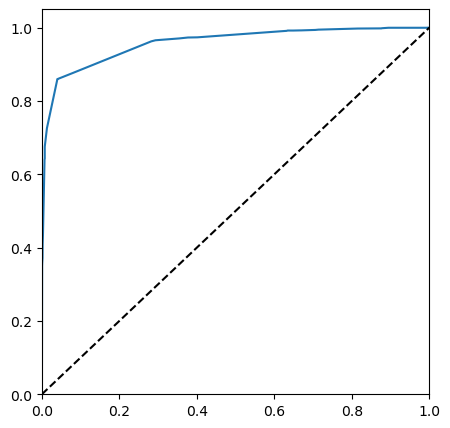

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Predicted)

### <font color='red'>6.3.6.1 Calculating the Area Under the Curve(GINI) </font>  

In [140]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [141]:
auc = auc_val(fpr,tpr)
auc

0.9581804239350635

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Inferences</div>__
<strong><font color='#800000'>As a rule of thumb, an AUC can be classed as follows,</font></strong><br>
  - <font color='#800000'>0.90 - 1.00 = excellent</font>
  - <font color='#800000'>0.80 - 0.90 = good</font>
  - <font color='#800000'>0.70 - 0.80 = fair</font>
  - <font color='#800000'>0.60 - 0.70 = poor</font>
  - <font color='#800000'>0.50 - 0.60 = fail</font><br>
  
<strong><font color='#800000'>Since we got a value of 0.9582, our model seems to be doing well on the test dataset.</font></strong>


### <font color='darkgreen'>6.3.7 Optimal Cutoff Point </font>  

In [142]:
x_num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in x_num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Predicted,Row_Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6676,1,0.969823,6676,1,1,1,1,1,1,1,1,1,1,1
6138,1,0.996401,6138,1,1,1,1,1,1,1,1,1,1,1
8650,1,0.969823,8650,1,1,1,1,1,1,1,1,1,1,1
3423,0,0.040822,3423,0,1,0,0,0,0,0,0,0,0,0
6552,0,0.218515,6552,0,1,1,1,0,0,0,0,0,0,0


In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380243     1.000000     0.000000
0.1   0.1  0.805155     0.965474     0.706794
0.2   0.2  0.805155     0.965474     0.706794
0.3   0.3  0.921069     0.856842     0.960475
0.4   0.4  0.921069     0.856842     0.960475
0.5   0.5  0.921069     0.856842     0.960475
0.6   0.6  0.921069     0.856842     0.960475
0.7   0.7  0.921069     0.856842     0.960475
0.8   0.8  0.886968     0.723789     0.987083
0.9   0.9  0.871758     0.674947     0.992508


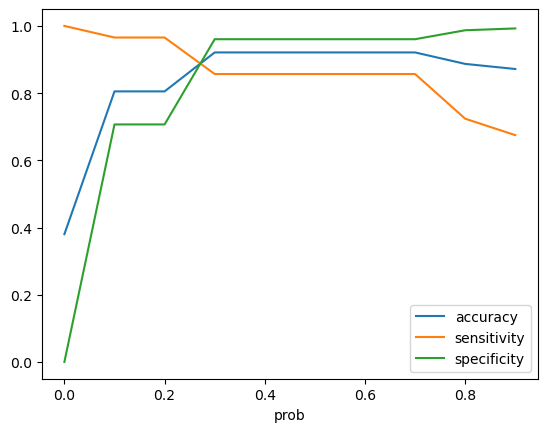

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [145]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_Predicted.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Predicted,Row_Index,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
6676,1,0.969823,6676,1,1,1,1,1,1,1,1,1,1,1,1
6138,1,0.996401,6138,1,1,1,1,1,1,1,1,1,1,1,1
8650,1,0.969823,8650,1,1,1,1,1,1,1,1,1,1,1,1
3423,0,0.040822,3423,0,1,0,0,0,0,0,0,0,0,0,0
6552,0,0.218515,6552,0,1,1,1,0,0,0,0,0,0,0,0


In [146]:
# Ooverall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9210694844700609

In [147]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3718,  153],
       [ 340, 2035]], dtype=int64)

In [148]:
TP = confusion2[1,1]  
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [149]:
# Sensitivity = Recall
recall = TP / float(TP+FN)
recall

0.8568421052631578

In [150]:
# Specificity
TN / float(TN+FP)

0.9604753293722552

In [151]:
# Precision
precision=TP/float(TP+FP)
precision

0.930073126142596

In [152]:
F1Scoure=(2*precision*recall)/float(precision+recall)
F1Scoure

0.8919570458031997

__<div style="background-color:#ADD8E6; color:red ;font-size:15px; height: 25px;">Observation:</div>__

<font color='#800000'>So as we can see above the model seems to be performing well. The ROC curve has a value of 0.9582 , which is very good. We have the following values for the Train Data:</font>
  - <font color='#800000'>Accuracy    : 92.11%</font>
  - <font color='#800000'>Sensitivity : 85.68%</font>
  - <font color='#800000'>Specificity : 96.05%</font>
  - <font color='#800000'>F1 Scoure : 89.20%</font>

# <font color=#00008B>7. Predictions on test set</font>

In [153]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7625,-0.297688,-0.397342,2.145058,-0.164140,1.446506,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
5207,-0.297688,0.277837,0.772700,0.876565,1.446506,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2390,-0.297688,-1.072521,-0.885722,-1.204846,-0.691321,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4362,-0.297688,-0.397342,-0.451952,-0.164140,-0.691321,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1023,-0.297688,3.991321,-0.293028,1.396918,-0.691321,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [154]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7625,0,0,1,0,0,0,0,0,0,0,0,0
5207,0,0,0,0,0,0,0,0,1,0,0,0
2390,0,1,0,0,0,0,0,0,1,0,0,0
4362,0,1,0,0,0,0,0,1,0,0,0,0
1023,0,0,0,0,1,0,0,0,0,0,0,0


In [155]:
X_test_sm = sm.add_constant(X_test)

In [156]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7625    0.016332
5207    0.969823
2390    0.996401
4362    0.068490
1023    0.044659
8226    0.969823
3079    0.218515
530     0.016332
7873    0.040822
5146    0.996401
dtype: float64

In [157]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Predicted':y_test_pred, 
                                   'Row_Index':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Predicted,Row_Index
7625,0,0.016332,7625
5207,1,0.969823,5207
2390,1,0.996401,2390
4362,0,0.068490,4362
1023,0,0.044659,1023


In [158]:
y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Predicted'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Converted,Converted_Predicted,Row_Index,Predicted
7625,0,0.016332,7625,0
5207,1,0.969823,5207,1
2390,1,0.996401,2390,1
4362,0,0.068490,4362,0
1023,0,0.044659,1023,0


In [159]:
from sklearn import metrics
# Confusion matrix 
test_confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
print(test_confusion)



[[1621   63]
 [ 120  874]]


In [160]:
# Overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

0.9316654219566841


In [161]:
test_TP = test_confusion[1,1] 
test_TN = test_confusion[0,0] 
test_FP = test_confusion[0,1] 
test_FN = test_confusion[1,0] 

In [162]:
# Sensitivity = Recall
test_recall = test_TP / float(test_TP+test_FN)
test_recall

0.8792756539235412

In [163]:
# Specificity
test_TN / float(test_TN+test_FP)

0.9625890736342043

In [164]:
# Precision
test_precision=test_TP/float(test_TP+test_FP)
test_precision

0.9327641408751334

In [165]:
test_F1Scoure=(2*test_precision*test_recall)/float(test_precision+test_recall)
test_F1Scoure

0.9052304505437597

In [166]:
# Positive predictive value 
print (test_TP / float(test_TP+test_FP))

0.9327641408751334


In [167]:
# Negative predictive value
print (test_TN / float(test_TN+ test_FN))

0.9310740953475014


# <font color=#00008B>8. Feature Importance</font>

In [168]:
# Selecting the coefficients of the selected features
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                     4.14
Last Activity_SMS Sent                           2.15
Tags_Already a student                          -2.82
Tags_Closed by Horizzon                          7.10
Tags_Interested in other courses                -1.79
Tags_Lost to EINS                                5.94
Tags_Others                                     -2.23
Tags_Ringing                                    -3.49
Tags_Will revert after reading the email         4.74
Tags_switched off                               -4.31
Last Notable Activity_Modified                  -1.88
Last Notable Activity_Olark Chat Conversation   -1.45
dtype: float64

In [169]:
# Getting a relative coeffient value for all the features
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                     58.26
Last Activity_SMS Sent                           30.33
Tags_Already a student                          -39.77
Tags_Closed by Horizzon                         100.00
Tags_Interested in other courses                -25.19
Tags_Lost to EINS                                83.62
Tags_Others                                     -31.41
Tags_Ringing                                    -49.15
Tags_Will revert after reading the email         66.83
Tags_switched off                               -60.69
Last Notable Activity_Modified                  -26.52
Last Notable Activity_Olark Chat Conversation   -20.45
dtype: float64

In [170]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                      9
Last Activity_SMS Sent                            7
Tags_Already a student                            2
Tags_Closed by Horizzon                           6
Tags_Interested in other courses                 10
Tags_Lost to EINS                                 4
Tags_Others                                      11
Tags_Ringing                                      1
Tags_Will revert after reading the email          0
Tags_switched off                                 8
Last Notable Activity_Modified                    5
Last Notable Activity_Olark Chat Conversation     3
dtype: int64

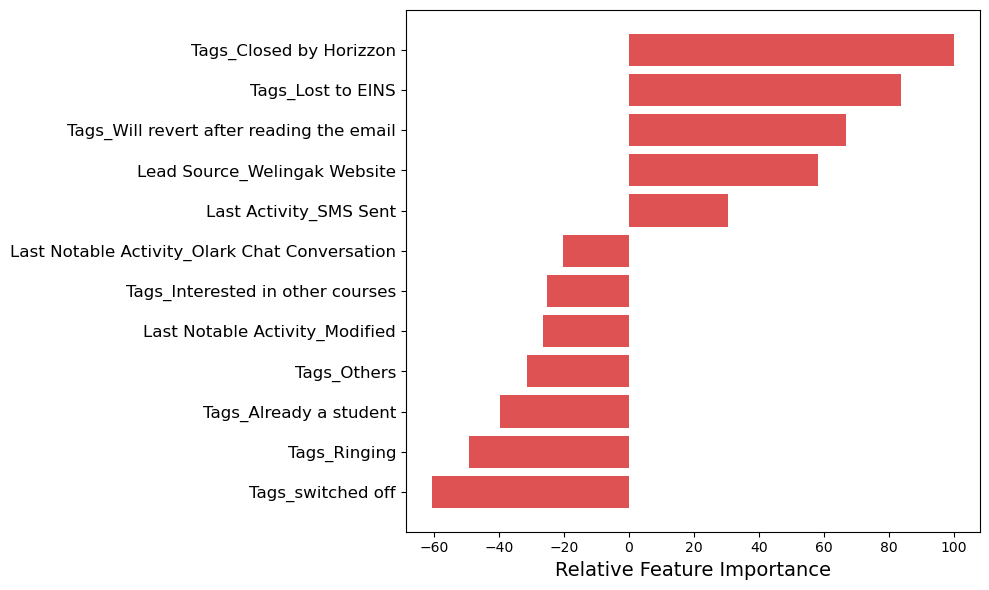

In [171]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [172]:
# Selecting Top 3 features
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Tags_Closed by Horizzon,100.00
5,Tags_Lost to EINS,83.62
8,Tags_Will revert after reading the email,66.83


In [173]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)

,index,0
3,Tags_Closed by Horizzon,100.00
5,Tags_Lost to EINS,83.62
8,Tags_Will revert after reading the email,66.83
0,Lead Source_Welingak Website,58.26
1,Last Activity_SMS Sent,30.33
11,Last Notable Activity_Olark Chat Conversation,-20.45
4,Tags_Interested in other courses,-25.19
10,Last Notable Activity_Modified,-26.52
6,Tags_Others,-31.41
2,Tags_Already a student,-39.77


# <font color=#00008B>8. Final Result:</font>

<strong><u><font color='#800000'> Train Data:</font></u></strong>
  - <font color='#800000'>Accuracy    : 92.11%</font>
  - <font color='#800000'>Sensitivity : 85.68%</font>
  - <font color='#800000'>Specificity : 96.05%</font>
  - <font color='#800000'>F1 Scoure : 89.20%</font>  
 
<strong><u><font color='#800000'> Test Data:</font></u></strong>
  - <font color='#800000'>Accuracy    : 93.17%</font>
  - <font color='#800000'>Sensitivity : 87.93%</font>
  - <font color='#800000'>Specificity : 96.26%</font>
  - <font color='#800000'>F1 Scoure : 90.52%</font>  
  


<strong><font color='#800000'> Based on our model, some features are identified which contribute most to a Lead getting converted successfully.</font></strong>

<strong><u><font color='#800000'>The conversion probability of a lead increases with increase in values of the following features in descending order:</font></u></strong>
  - <font color='#800000'>Tags_Closed by Horizzon	</font>
  - <font color='#800000'>Tags_Lost to EINS	</font>
  - <font color='#800000'>Tags_Will revert after reading the email	</font>
  - <font color='#800000'>Lead Source_Welingak Website</font>
  - <font color='#800000'>Last Activity_SMS Sen</font>


<strong><u><font color='#800000'>The conversion probability of a lead increases with decrease in values of the following features in descending order:</font></u></strong>
  - <font color='#800000'>Last Notable Activity_Olark Chat Conversation	</font>
  - <font color='#800000'>Tags_Interested in other courses	</font>
  - <font color='#800000'>Last Notable Activity_Modified	</font>
  - <font color='#800000'>Tags_Others	</font>
  - <font color='#800000'>Tags_Already a student</font>
  - <font color='#800000'>Tags_Ringing</font>
  - <font color='#800000'>Tags_switched off	</font>


<strong><u><font color='darkblue'> The Model seems to predict the Conversion Rate very well, we should give the CEO confidence in making good calls based on this model</font></u></strong>